# 02_read_sca_hypsometry

### <i><p>Purpose of this notebook:  Introduce you to:     <ol>         <li> CHARIS ASCII file format for hypsometry data</li>         <li> pandas (http://pandas.pydata.org), a python module for working with spreadsheet-types of data</li>         <li> my hypsometry.py python module (included in the short course materials) for reading and writing hypsometry data     </ol> </p>     <p>At the end of this lesson, you should be able to read a sample hypsometry file, and:     <ol>         <li> see if it includes comments         <li> figure out how many rows and columns it has         <li> look at the hypsometry data         <li> display one column of data, as a function of time         <li> create and customize figures     </ol> </p></i>

Let's begin with a few configuration things:
tell ipython to display plots right here in the notebook, and tell python I want to use numpy (for numerical array types), matplotlib (for making nice plots), and pandas (for working with DataFrames and Series data).

Configure pandas display options to display big arrays nicely.

In [12]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#pd.describe_option('display')
pd.set_option('display.max_rows', 370)
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 200)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


CHARIS hypsometry files are ASCII-formatted files that I defined.  I originally worked on them in IDL but python will read and write them also.

Here's an example file:

In [13]:
!cat test.sca_by_elev.txt

# MODSCAG_GF SCA by elevation
# elevation values are meters, at bottom of elevation band
# data values are areas, in square km
63
1400.0 1500.0 1600.0 1700.0 1800.0 1900.0 2000.0 2100.0 2200.0 2300.0 2400.0 2500.0 2600.0 2700.0 2800.0 2900.0 3000.0 3100.0 3200.0 3300.0 3400.0 3500.0 3600.0 3700.0 3800.0 3900.0 4000.0 4100.0 4200.0 4300.0 4400.0 4500.0 4600.0 4700.0 4800.0 4900.0 5000.0 5100.0 5200.0 5300.0 5400.0 5500.0 5600.0 5700.0 5800.0 5900.0 6000.0 6100.0 6200.0 6300.0 6400.0 6500.0 6600.0 6700.0 6800.0 6900.0 7000.0 7100.0 7200.0 7300.0 7400.0 7500.0 7600.0
2001 1 1 1 0.000000  0.350881  0.288029  0.107759  0.723593  1.075053  1.479878  1.888137  2.819928  6.869486  11.475485  18.770580  23.539839  37.571785  45.258991  58.313545  75.618950  98.407509  109.481323  124.540115  139.901047  159.709427  183.575012  205.393692  223.748779  255.835587  271.589386  311.170837  343.559784  384.976685  403.775177  442.533600  468.865540  520.615601  511.643433  549.194824  527.820190  54

The next cell has an "import" trick that lets you edit a python script, run it, edit the script again and run it again, all from inside ipython:

In [14]:
!ls

01_Intro_to_Ipython_Notebooks.ipynb     hypsometry.pyc
02_read_sca_hypsometry.ipynb            modice_area_by_elev
03_Ablation_Gradient_Model.ipynb        modscag_gf_by_year
04_Temperature_Index_Melt_Model.ipynb   racovite_ablation_model.pyc
MODIS_persistence_by_year               read_hypsometry.ipynb
basin_area_by_elev                      reading_CSU_data.ipynb
clean_ice_melt_by_elev                  reading_and_writing_netcdf_arrays.ipynb
discharge_by_day                        test.sca_by_elev.txt
forcing_data                            wapda_discharge.py
hypsometry.py


In [15]:
from imp import reload
import hypsometry
reload(hypsometry)
filename = "test.sca_by_elev.txt"
sca = hypsometry.Hypsometry()
sca.read( filename, verbose=True )

hypsometry: read hypsometry data from test.sca_by_elev.txt
hypsometry: 3 comments.
hypsometry: 365 dates.
hypsometry: 63 elevations.


In [16]:
#sca.data.drop?
pd.__version__

'0.16.2'

In [17]:
#%debug

So this "sca" variable now contains a pandas object that includes two "attributes", a string array with the comments (one comment line each), and a thing called a pandas "DataFrame".

Pandas DataFrame terminology:
<ul>
    <li> rows and columns can be referred to by name as well as integers (like in a matrix)
    <li> df.index : the names of the rows (hypsometry.py makes these dates)
    <li> df.columns : the names of the columns (hypsometry.py makes these elevation bands)
</ul>
    

In [18]:
help( sca )

Help on instance of Hypsometry in module hypsometry:

class Hypsometry
 |  Hypsometry class will read(write) CHARIS hypsometry data from(to) ASCII files.
 |  Actual hypsometry data will contain the comments from the beginning of the file,
 |  and a pandas DataFrame.
 |  
 |  2014-09-24 M. J. Brodzik brodzik@nsidc.org 303-492-8263
 |  National Snow & Ice Data Center, Boulder CO
 |  Copyright (C) 2014 Regents of the University of Colorado at Boulder
 |  
 |  Methods defined here:
 |  
 |  __init__(self, comments=[], data=Empty DataFrame
 |  Columns: []
 |  Index: [], verbose=False)
 |      usage: hyp = hypsometry( comments=[], data=pd.DataFrame(), verbose=False
 |      
 |      Initializer for a CHARIS hypsometry object
 |      
 |      comments : list of strings
 |      data : pandas DataFrame with elevations in columns and dates in rows
 |             index can be [None] for undated data, or
 |             should be a pandas.tseries.index.DatetimeIndex for dated contents
 |  
 |  data_

In [19]:
sca.comments

['# MODSCAG_GF SCA by elevation',
 '# elevation values are meters, at bottom of elevation band',
 '# data values are areas, in square km']

In [20]:
sca.data

,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,2400.0,2500.0,2600.0,2700.0,2800.0,2900.0,3000.0,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,3900.0,4000.0,4100.0,4200.0,4300.0,4400.0,4500.0,4600.0,4700.0,4800.0,4900.0,5000.0,5100.0,5200.0,5300.0,5400.0,5500.0,5600.0,5700.0,5800.0,5900.0,6000.0,6100.0,6200.0,6300.0,6400.0,6500.0,6600.0,6700.0,6800.0,6900.0,7000.0,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.000000,0.350881,0.288029,0.107759,0.723593,1.075053,1.479878,1.888137,2.819928,6.869486,11.475485,18.770580,23.539839,37.571785,45.258991,58.313545,75.618950,98.407509,109.481323,124.540115,139.901047,159.709427,183.575012,205.393692,223.748779,255.835587,271.589386,311.170837,343.559784,384.976685,403.775177,442.533600,468.865540,520.615601,511.643433,549.194824,527.820190,544.116089,520.179016,451.494202,394.106781,308.375214,237.771515,170.135086,115.261742,86.346596,69.249130,51.323139,41.376740,38.618759,34.043415,24.366207,24.095816,21.965036,14.542485,11.176612,12.601063,8.180685,5.567430,4.136129,3.105402,1.911621,0.488112
2001-01-02,0.017387,1.454463,1.212285,0.466432,1.221172,1.763915,2.692399,3.270561,3.555070,7.739756,12.009012,19.845352,23.796310,37.705723,45.120823,57.757401,74.229279,96.657829,106.962242,122.813690,137.407364,156.885284,179.434433,200.203598,218.428314,249.800186,264.601166,304.201996,334.951447,374.930878,392.742737,430.429871,454.205292,503.627411,494.258118,529.328857,508.478699,524.046875,501.057251,436.041229,381.136139,298.980896,231.039047,165.357971,112.498474,84.321381,67.829727,50.306320,40.380802,37.814663,33.566395,23.861654,23.514660,21.417894,14.294745,10.944931,12.290499,8.058737,5.433397,4.107623,3.032999,1.839174,0.458876
2001-01-03,0.020757,1.599701,1.187170,0.655138,1.669336,2.509553,3.646214,4.546192,4.701798,9.258268,14.011136,21.774902,24.856979,38.479221,45.790794,58.224888,73.894287,96.058792,105.648033,121.472107,135.018982,154.222107,175.252365,195.863113,213.751434,244.037903,258.698883,298.645752,328.558075,368.343842,386.060211,424.262543,446.886475,495.610443,486.295654,522.222473,500.784180,516.956665,493.683258,429.817017,375.353790,295.305695,228.179840,163.193771,111.642700,83.611938,67.523697,49.857742,39.957275,37.441784,33.455147,23.643751,23.213791,21.198601,14.212723,10.806521,12.132765,7.995263,5.347770,4.098392,2.968965,1.791176,0.437174
2001-01-04,0.019212,0.860910,0.631290,0.825856,2.663206,3.998790,5.017432,6.698186,6.733673,11.279051,17.077715,23.992182,26.608988,39.422653,46.866989,59.225677,74.615219,96.612007,105.565689,120.240486,133.152191,151.956451,171.899261,193.266327,210.884750,240.505341,256.030151,296.492615,326.636108,367.747284,386.261749,426.352325,449.922760,500.155701,491.464386,530.515625,507.966278,525.417603,501.522827,435.680878,379.681335,299.038574,230.780518,164.816559,113.234550,84.719170,68.409943,50.258221,40.289352,37.743427,33.709656,23.843491,23.356667,21.364264,14.318376,10.829168,12.183534,8.031734,5.349766,4.118656,2.949475,1.787441,0.430820
2001-01-05,0.054888,0.791811,0.652713,1.007844,3.341506,5.047784,6.015337,8.236839,8.641469,12.814977,18.692183,24.906126,27.438200,39.780891,47.125824,59.295696,74.767944,96.160728,104.842239,118.694489,131.820450,150.107742,169.698349,191.942245,209.362946,238.999359,255.555191,296.447418,327.215576,369.928711,389.248993,430.999298,455.985352,508.183746,500.406921,541.677429,518.831238,537.214294,513.254272,445.434875,387.975830,305.476990,235.682114,168.264343,115.610725,86.508415,69.603516,51.128578,40.935928,38.372223,34.171246,24.305304,23.790161,21.732061,14.512557,10.965686,12.370435,8.126849,5.408155,4.148344,2.963020,1.826037,0.439600
2001-01-06,0.000000,0.902082,0.922109,0.913373,3.206936,4.895827,5.711488,8.179827,8.643897,12.207982,17.915945,23.382437,26.499350,38.458317,45.827702,57.953232,73.345222,94.432617,103.178635,116.439445,130.675293,148.710709,16

Look at the names of rows with the pandas "index" attribute:

In [21]:
sca.data.index 
#sca.data.index.tolist()  # equivalently: list( sca.data.index )
#help( sca.data.index)

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08', '2001-01-09', '2001-01-10', 
               ...
               '2001-12-22', '2001-12-23', '2001-12-24', '2001-12-25', '2001-12-26', '2001-12-27', '2001-12-28', '2001-12-29', '2001-12-30', '2001-12-31'],
              dtype='datetime64[ns]', name=u'Date', length=365, freq=None, tz=None)

In [22]:
sca.data.index.date

array([datetime.date(2001, 1, 1), datetime.date(2001, 1, 2),
       datetime.date(2001, 1, 3), datetime.date(2001, 1, 4),
       datetime.date(2001, 1, 5), datetime.date(2001, 1, 6),
       datetime.date(2001, 1, 7), datetime.date(2001, 1, 8),
       datetime.date(2001, 1, 9), datetime.date(2001, 1, 10),
       datetime.date(2001, 1, 11), datetime.date(2001, 1, 12),
       datetime.date(2001, 1, 13), datetime.date(2001, 1, 14),
       datetime.date(2001, 1, 15), datetime.date(2001, 1, 16),
       datetime.date(2001, 1, 17), datetime.date(2001, 1, 18),
       datetime.date(2001, 1, 19), datetime.date(2001, 1, 20),
       datetime.date(2001, 1, 21), datetime.date(2001, 1, 22),
       datetime.date(2001, 1, 23), datetime.date(2001, 1, 24),
       datetime.date(2001, 1, 25), datetime.date(2001, 1, 26),
       datetime.date(2001, 1, 27), datetime.date(2001, 1, 28),
       datetime.date(2001, 1, 29), datetime.date(2001, 1, 30),
       datetime.date(2001, 1, 31), datetime.date(2001, 2, 1),
  

In [23]:
list( sca.data.index)

[Timestamp('2001-01-01 00:00:00'),
 Timestamp('2001-01-02 00:00:00'),
 Timestamp('2001-01-03 00:00:00'),
 Timestamp('2001-01-04 00:00:00'),
 Timestamp('2001-01-05 00:00:00'),
 Timestamp('2001-01-06 00:00:00'),
 Timestamp('2001-01-07 00:00:00'),
 Timestamp('2001-01-08 00:00:00'),
 Timestamp('2001-01-09 00:00:00'),
 Timestamp('2001-01-10 00:00:00'),
 Timestamp('2001-01-11 00:00:00'),
 Timestamp('2001-01-12 00:00:00'),
 Timestamp('2001-01-13 00:00:00'),
 Timestamp('2001-01-14 00:00:00'),
 Timestamp('2001-01-15 00:00:00'),
 Timestamp('2001-01-16 00:00:00'),
 Timestamp('2001-01-17 00:00:00'),
 Timestamp('2001-01-18 00:00:00'),
 Timestamp('2001-01-19 00:00:00'),
 Timestamp('2001-01-20 00:00:00'),
 Timestamp('2001-01-21 00:00:00'),
 Timestamp('2001-01-22 00:00:00'),
 Timestamp('2001-01-23 00:00:00'),
 Timestamp('2001-01-24 00:00:00'),
 Timestamp('2001-01-25 00:00:00'),
 Timestamp('2001-01-26 00:00:00'),
 Timestamp('2001-01-27 00:00:00'),
 Timestamp('2001-01-28 00:00:00'),
 Timestamp('2001-01-

In [24]:
sca.write( 'out.txt', verbose=True)
#sca.write( 'out.txt', verbose=True)

hypsometry: wrote hypsometry data to out.txt
hypsometry: 3 comments.
hypsometry: 365 dates.
hypsometry: 63 elevations.


In [25]:
!cat out.txt

# MODSCAG_GF SCA by elevation
# elevation values are meters, at bottom of elevation band
# data values are areas, in square km
63
1400.0 1500.0 1600.0 1700.0 1800.0 1900.0 2000.0 2100.0 2200.0 2300.0 2400.0 2500.0 2600.0 2700.0 2800.0 2900.0 3000.0 3100.0 3200.0 3300.0 3400.0 3500.0 3600.0 3700.0 3800.0 3900.0 4000.0 4100.0 4200.0 4300.0 4400.0 4500.0 4600.0 4700.0 4800.0 4900.0 5000.0 5100.0 5200.0 5300.0 5400.0 5500.0 5600.0 5700.0 5800.0 5900.0 6000.0 6100.0 6200.0 6300.0 6400.0 6500.0 6600.0 6700.0 6800.0 6900.0 7000.0 7100.0 7200.0 7300.0 7400.0 7500.0 7600.0
2001 1 1 1 0.000000 0.350881 0.288029 0.107759 0.723593 1.075053 1.479878 1.888137 2.819928 6.869486 11.475485 18.770580 23.539839 37.571785 45.258991 58.313545 75.618950 98.407509 109.481323 124.540115 139.901047 159.709427 183.575012 205.393692 223.748779 255.835587 271.589386 311.170837 343.559784 384.976685 403.775177 442.533600 468.865540 520.615601 511.643433 549.194824 527.820190 544.116089 520.179016 451.494202 394.10

In [26]:
sca.data.describe()

,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,2400.0,2500.0,2600.0,2700.0,2800.0,2900.0,3000.0,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,3900.0,4000.0,4100.0,4200.0,4300.0,4400.0,4500.0,4600.0,4700.0,4800.0,4900.0,5000.0,5100.0,5200.0,5300.0,5400.0,5500.0,5600.0,5700.0,5800.0,5900.0,6000.0,6100.0,6200.0,6300.0,6400.0,6500.0,6600.0,6700.0,6800.0,6900.0,7000.0,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.012508,0.500355,0.743018,0.801582,1.812993,2.311187,2.658534,3.761569,4.190426,5.412907,7.113953,9.798586,10.399188,14.629185,17.524377,22.216264,28.703484,38.515951,45.408963,54.478836,65.763654,79.630490,89.713946,109.082209,122.487083,145.490929,158.600031,192.600584,220.902007,255.012958,278.077325,316.702584,345.294710,396.390522,403.154805,446.966622,443.221234,473.810402,463.817102,414.918963,369.794446,296.239760,233.365348,170.025011,117.715925,89.523933,72.182987,53.239690,43.174788,40.450424,35.628789,25.691221,25.329545,22.985581,15.538267,11.805626,13.315580,8.639703,5.862426,4.366043,3.331734,2.075111,0.536352
std,0.039352,0.942257,1.330657,1.309429,2.570104,3.202896,3.615905,4.971085,5.440585,6.571470,7.784798,10.096934,10.832610,14.765947,17.252240,20.904072,25.621785,31.843142,35.477354,41.348517,47.083511,52.905002,59.621113,67.112274,73.182933,82.713951,86.786553,97.425780,106.016660,117.261159,119.811462,127.538777,129.799609,139.187859,130.661511,132.359517,117.428185,108.778188,93.170121,71.229541,55.720375,37.747555,25.051100,16.126948,9.550013,6.452507,4.865570,3.565313,2.621844,2.426522,2.131120,1.470319,1.525434,1.243262,0.853062,0.661489,0.695320,0.457447,0.297256,0.222820,0.190507,0.123556,0.040931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016937,0.073199,0.260188,0.711443,2.638821,3.739440,3.306688,5.413692,7.138326,6.500573,9.654099,10.471350,13.136212,16.166458,24.233791,27.245512,32.201881,46.282730,59.104229,77.498169,103.528351,126.138680,158.450638,180.423920,226.061661,248.234314,248.691727,238.382523,205.387619,172.844666,128.956558,93.526016,73.569107,59.703201,44.300594,36.645527,34.885960,30.617136,22.520639,22.001934,20.521021,13.656950,10.311346,11.673913,7.407013,5.180185,3.816138,2.949475,1.787441,0.430820
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.065750,0.091337,0.197057,0.710198,1.206253,1.029374,2.119089,3.090591,4.904113,6.602215,10.883751,14.022267,17.120102,21.598284,30.523952,34.122372,45.100410,53.751633,67.270454,74.802139,96.471092,114.342537,140.246307,162.071732,208.086594,240.673935,292.416473,309.622589,350.269958,356.857300,396.381714,401.689423,372.275665,339.292480,277.855988,222.637573,162.478622,113.252266,86.640427,69.378441,51.280197,41.518948,38.678024,34.333195,24.679312,24.240185,22.078117,14.846606,11.274776,12.707859,8.283872,5.623478,4.195761,3.188325,1.990873,0.509621
50%,0.000000,0.000000,0.030997,0.117912,0.460700,0.627211,0.827810,1.354582,1.712568,2.369402,3.994369,6.052817,5.860610,7.861678,9.525973,13.025336,17.807180,26.382429,33.076862,42.877743,54.547108,70.929710,82.591049,107.286430,120.954330,146.827560,164.646027,206.506241,238.535812,283.052094,312.667297,357.447449,387.310669,443.526123,451.741760,500.164856,4

In [27]:
sca.data.columns

Index([u'1400.0', u'1500.0', u'1600.0', u'1700.0', u'1800.0', u'1900.0', u'2000.0', u'2100.0', u'2200.0', u'2300.0', u'2400.0', u'2500.0', u'2600.0', u'2700.0', u'2800.0', u'2900.0', u'3000.0',
       u'3100.0', u'3200.0', u'3300.0', u'3400.0', u'3500.0', u'3600.0', u'3700.0', u'3800.0', u'3900.0', u'4000.0', u'4100.0', u'4200.0', u'4300.0', u'4400.0', u'4500.0', u'4600.0', u'4700.0',
       u'4800.0', u'4900.0', u'5000.0', u'5100.0', u'5200.0', u'5300.0', u'5400.0', u'5500.0', u'5600.0', u'5700.0', u'5800.0', u'5900.0', u'6000.0', u'6100.0', u'6200.0', u'6300.0', u'6400.0',
       u'6500.0', u'6600.0', u'6700.0', u'6800.0', u'6900.0', u'7000.0', u'7100.0', u'7200.0', u'7300.0', u'7400.0', u'7500.0', u'7600.0'],
      dtype='object')

In [48]:
sca.data.ix['2001-01-05','1500.0']
#sca.data.ix['2001-01-05']  order matters!

0.79181099999999993

## Printing sca for specific dates

To slice hypsometry data by rows (a range of dates):

In [29]:
sca.data.loc['2001-01-01':'2001-01-05']

,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,2400.0,2500.0,2600.0,2700.0,2800.0,2900.0,3000.0,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,3900.0,4000.0,4100.0,4200.0,4300.0,4400.0,4500.0,4600.0,4700.0,4800.0,4900.0,5000.0,5100.0,5200.0,5300.0,5400.0,5500.0,5600.0,5700.0,5800.0,5900.0,6000.0,6100.0,6200.0,6300.0,6400.0,6500.0,6600.0,6700.0,6800.0,6900.0,7000.0,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.000000,0.350881,0.288029,0.107759,0.723593,1.075053,1.479878,1.888137,2.819928,6.869486,11.475485,18.770580,23.539839,37.571785,45.258991,58.313545,75.618950,98.407509,109.481323,124.540115,139.901047,159.709427,183.575012,205.393692,223.748779,255.835587,271.589386,311.170837,343.559784,384.976685,403.775177,442.533600,468.865540,520.615601,511.643433,549.194824,527.820190,544.116089,520.179016,451.494202,394.106781,308.375214,237.771515,170.135086,115.261742,86.346596,69.249130,51.323139,41.376740,38.618759,34.043415,24.366207,24.095816,21.965036,14.542485,11.176612,12.601063,8.180685,5.567430,4.136129,3.105402,1.911621,0.488112
2001-01-02,0.017387,1.454463,1.212285,0.466432,1.221172,1.763915,2.692399,3.270561,3.555070,7.739756,12.009012,19.845352,23.796310,37.705723,45.120823,57.757401,74.229279,96.657829,106.962242,122.813690,137.407364,156.885284,179.434433,200.203598,218.428314,249.800186,264.601166,304.201996,334.951447,374.930878,392.742737,430.429871,454.205292,503.627411,494.258118,529.328857,508.478699,524.046875,501.057251,436.041229,381.136139,298.980896,231.039047,165.357971,112.498474,84.321381,67.829727,50.306320,40.380802,37.814663,33.566395,23.861654,23.514660,21.417894,14.294745,10.944931,12.290499,8.058737,5.433397,4.107623,3.032999,1.839174,0.458876
2001-01-03,0.020757,1.599701,1.187170,0.655138,1.669336,2.509553,3.646214,4.546192,4.701798,9.258268,14.011136,21.774902,24.856979,38.479221,45.790794,58.224888,73.894287,96.058792,105.648033,121.472107,135.018982,154.222107,175.252365,195.863113,213.751434,244.037903,258.698883,298.645752,328.558075,368.343842,386.060211,424.262543,446.886475,495.610443,486.295654,522.222473,500.784180,516.956665,493.683258,429.817017,375.353790,295.305695,228.179840,163.193771,111.642700,83.611938,67.523697,49.857742,39.957275,37.441784,33.455147,23.643751,23.213791,21.198601,14.212723,10.806521,12.132765,7.995263,5.347770,4.098392,2.968965,1.791176,0.437174
2001-01-04,0.019212,0.860910,0.631290,0.825856,2.663206,3.998790,5.017432,6.698186,6.733673,11.279051,17.077715,23.992182,26.608988,39.422653,46.866989,59.225677,74.615219,96.612007,105.565689,120.240486,133.152191,151.956451,171.899261,193.266327,210.884750,240.505341,256.030151,296.492615,326.636108,367.747284,386.261749,426.352325,449.922760,500.155701,491.464386,530.515625,507.966278,525.417603,501.522827,435.680878,379.681335,299.038574,230.780518,164.816559,113.234550,84.719170,68.409943,50.258221,40.289352,37.743427,33.709656,23.843491,23.356667,21.364264,14.318376,10.829168,12.183534,8.031734,5.349766,4.118656,2.949475,1.787441,0.430820
2001-01-05,0.054888,0.791811,0.652713,1.007844,3.341506,5.047784,6.015337,8.236839,8.641469,12.814977,18.692183,24.906126,27.438200,39.780891,47.125824,59.295696,74.767944,96.160728,104.842239,118.694489,131.820450,150.107742,169.698349,191.942245,209.362946,238.999359,255.555191,296.447418,327.215576,369.928711,389.248993,430.999298,455.985352,508.183746,500.406921,541.677429,518.831238,537.214294,513.254272,445.434875,387.975830,305.476990,235.682114,168.264343,115.610725,86.508415,69.603516,51.128578,40.935928,38.372223,34.171246,24.305304,23.790161,21.732061,14.512557,10.965686,12.370435,8.126849,5.408155,4.148344,2.963020,1.826037,0.439600


To see every 30 days:

In [30]:
sca.data.ix[::30]

,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,2400.0,2500.0,2600.0,2700.0,2800.0,2900.0,3000.0,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,3900.0,4000.0,4100.0,4200.0,4300.0,4400.0,4500.0,4600.0,4700.0,4800.0,4900.0,5000.0,5100.0,5200.0,5300.0,5400.0,5500.0,5600.0,5700.0,5800.0,5900.0,6000.0,6100.0,6200.0,6300.0,6400.0,6500.0,6600.0,6700.0,6800.0,6900.0,7000.0,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.000000,0.350881,0.288029,0.107759,0.723593,1.075053,1.479878,1.888137,2.819928,6.869486,11.475485,18.770580,23.539839,37.571785,45.258991,58.313545,75.618950,98.407509,109.481323,124.540115,139.901047,159.709427,183.575012,205.393692,223.748779,255.835587,271.589386,311.170837,343.559784,384.976685,403.775177,442.533600,468.865540,520.615601,511.643433,549.194824,527.820190,544.116089,520.179016,451.494202,394.106781,308.375214,237.771515,170.135086,115.261742,86.346596,69.249130,51.323139,41.376740,38.618759,34.043415,24.366207,24.095816,21.965036,14.542485,11.176612,12.601063,8.180685,5.567430,4.136129,3.105402,1.911621,0.488112
2001-01-31,0.000000,0.089899,0.102435,0.280215,0.929536,2.114152,3.499323,3.868793,4.069263,6.175429,8.074172,10.250660,11.292164,18.139454,22.142059,30.825787,41.787956,59.851540,69.176506,84.279190,104.142670,121.569565,134.561249,159.532883,177.964554,208.006226,222.454269,266.040558,298.525787,340.553101,363.035492,402.821259,431.490692,481.510559,480.082062,519.173279,499.594269,518.182922,494.338745,431.873474,377.365234,295.614105,227.914246,164.479767,112.505150,85.680313,68.598274,51.052296,41.078529,38.226120,33.937988,24.632635,24.016930,22.599768,14.962544,11.394125,12.636868,8.354967,5.598792,4.298454,3.193756,2.000469,0.527073
2001-03-02,0.016099,0.429339,0.552209,0.425711,0.274463,1.048908,1.679769,2.160196,1.926068,3.085912,2.991484,3.071079,5.320701,7.861678,9.525973,14.574636,22.605991,32.170845,44.204021,58.703365,81.169678,105.188225,119.129013,151.690735,176.172928,216.688721,234.724792,286.149506,329.315643,378.414581,407.228699,462.467590,493.730560,558.148865,557.653381,603.695068,583.380371,605.610046,577.164612,502.570343,440.390015,344.122406,265.111023,189.700958,128.657761,96.999855,76.856026,57.110981,45.340832,42.634464,37.636974,27.142752,26.458302,23.697090,16.168459,12.331302,13.795963,8.970478,6.135975,4.521786,3.384931,2.128298,0.528962
2001-04-01,0.000000,0.000000,0.000000,0.062680,0.064054,0.487039,0.803253,1.020315,1.310770,1.827582,2.284162,2.769655,3.777176,5.806388,7.032796,10.282470,14.911611,21.087561,28.535086,38.098236,51.601841,70.929710,78.200485,103.213806,117.759003,141.744904,161.350525,205.116837,238.448730,283.687469,312.667297,361.262695,400.770813,464.203125,472.168182,526.283997,518.377441,549.189758,532.664368,471.063599,416.018921,329.708710,257.195068,185.525818,126.825432,94.727478,75.636154,55.600182,44.595276,41.719856,36.358921,26.153460,26.235195,23.578930,15.864051,11.968208,13.473075,8.762882,5.955061,4.483984,3.298853,2.111211,0.545534
2001-05-01,0.000000,0.000000,0.000000,0.082300,0.387330,0.229599,0.489422,0.849662,0.733296,1.032551,4.241677,8.322745,6.389294,8.002280,9.546125,13.276380,16.066040,25.066101,33.829224,43.898403,53.501747,68.907242,85.815521,110.358543,123.738518,155.874283,171.873367,217.854416,256.730438,302.449280,333.225433,380.725372,416.843353,480.082611,490.233582,540.283325,533.616028,565.670715,549.791138,487.342773,430.584930,341.828156,266.476685,193.343307,132.343567,99.520912,79.915627,58.465221,47.245373,43.969109,39.381329,28.073055,27.778761,24.912807,16.921045,12.744286,14.356758,9.340679,6.306350,4.667066,3.574582,2.214183,0.581553
2001-05-31,0.000000,0.000000,0.000000,0.000000,0.054523,0.000000,0.096124,0.615169,0.746905,0.635197,0.897638,1.122708,0.931297,1.139022,1.620501,2.004054,3.188712,4.516740,6.635293,7.492405,10.150800,14.496224,15.874933,22.909330,27.581604,36.672848,44.990517,

To just look at a single column (this will return a pandas "Series" object, basically an index and value for every entry):

In [31]:
sca.data['1400.0']

Date
2001-01-01    0.000000
2001-01-02    0.017387
2001-01-03    0.020757
2001-01-04    0.019212
2001-01-05    0.054888
2001-01-06    0.000000
2001-01-07    0.000000
2001-01-08    0.000000
2001-01-09    0.000000
2001-01-10    0.000000
2001-01-11    0.000000
2001-01-12    0.000000
2001-01-13    0.000000
2001-01-14    0.018783
2001-01-15    0.146977
2001-01-16    0.300629
2001-01-17    0.355024
2001-01-18    0.300801
2001-01-19    0.252052
2001-01-20    0.195812
2001-01-21    0.094428
2001-01-22    0.021101
2001-01-23    0.000000
2001-01-24    0.000000
2001-01-25    0.000000
2001-01-26    0.000000
2001-01-27    0.000000
2001-01-28    0.000000
2001-01-29    0.000000
2001-01-30    0.000000
2001-01-31    0.000000
2001-02-01    0.022088
2001-02-02    0.044477
2001-02-03    0.061156
2001-02-04    0.042073
2001-02-05    0.000000
2001-02-06    0.018826
2001-02-07    0.020994
2001-02-08    0.000000
2001-02-09    0.000000
2001-02-10    0.000000
2001-02-11    0.000000
2001-02-12    0.000000
2001-0

## Just look at SCA at selected elevations in this basin:

In [32]:
elevations = ['1400.0','2400.0','3400.0','4400.0','5400.0']
sca.data[elevations]

,1400.0,2400.0,3400.0,4400.0,5400.0
Date,,,,,
2001-01-01,0.000000,11.475485,139.901047,403.775177,394.106781
2001-01-02,0.017387,12.009012,137.407364,392.742737,381.136139
2001-01-03,0.020757,14.011136,135.018982,386.060211,375.353790
2001-01-04,0.019212,17.077715,133.152191,386.261749,379.681335
2001-01-05,0.054888,18.692183,131.820450,389.248993,387.975830
2001-01-06,0.000000,17.915945,130.675293,395.875061,399.056427
2001-01-07,0.000000,14.064863,128.448746,402.367401,408.297577
2001-01-08,0.000000,9.663677,125.445023,402.806458,410.768982
2001-01-09,0.000000,7.495344,122.467430,397.150543,407.532288


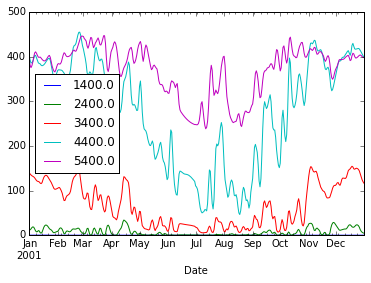

In [33]:
sca.data[elevations].plot()

But notice how the elevations go from highest to lowest, where you'd really want to see lowest to highest:

In [34]:
elevations[::-1]

['5400.0', '4400.0', '3400.0', '2400.0', '1400.0']

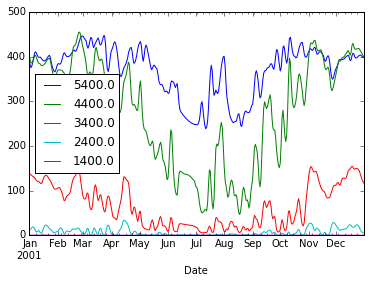

In [35]:
sca.data[elevations[::-1]].plot()

Or you might not want them all on the same plot, maybe separate plots, sharing a y axis range would be better:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1086bd510>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x108b5a410>], dtype=object)

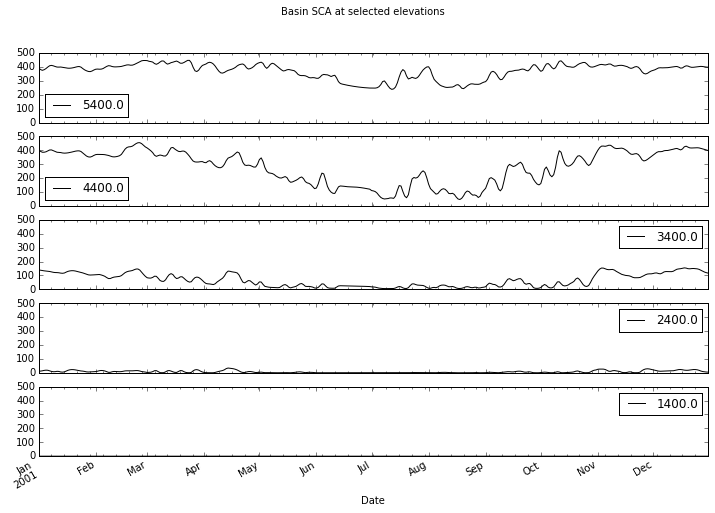

In [36]:
sca.data[elevations[::-1]].plot( title="Basin SCA at selected elevations",
                                subplots=True, sharey=True, figsize=(12,8) )

In [37]:
#help(sca.data)
help(sca)

Help on instance of Hypsometry in module hypsometry:

class Hypsometry
 |  Hypsometry class will read(write) CHARIS hypsometry data from(to) ASCII files.
 |  Actual hypsometry data will contain the comments from the beginning of the file,
 |  and a pandas DataFrame.
 |  
 |  2014-09-24 M. J. Brodzik brodzik@nsidc.org 303-492-8263
 |  National Snow & Ice Data Center, Boulder CO
 |  Copyright (C) 2014 Regents of the University of Colorado at Boulder
 |  
 |  Methods defined here:
 |  
 |  __init__(self, comments=[], data=Empty DataFrame
 |  Columns: []
 |  Index: [], verbose=False)
 |      usage: hyp = hypsometry( comments=[], data=pd.DataFrame(), verbose=False
 |      
 |      Initializer for a CHARIS hypsometry object
 |      
 |      comments : list of strings
 |      data : pandas DataFrame with elevations in columns and dates in rows
 |             index can be [None] for undated data, or
 |             should be a pandas.tseries.index.DatetimeIndex for dated contents
 |  
 |  data_

## Total the SCA by date and display basin SCA time series

I want to do this so often, I wrote a method on the hypsometry Class that will total up each row (date) for all elevations and return a total for each day:

In [38]:
sca_by_doy = sca.data_by_doy()
sca_by_doy.head()

Date
2001-01-01    9717.023489
2001-01-02    9447.839111
2001-01-03    9318.346912
2001-01-04    9384.030519
2001-01-05    9504.942010
dtype: float64

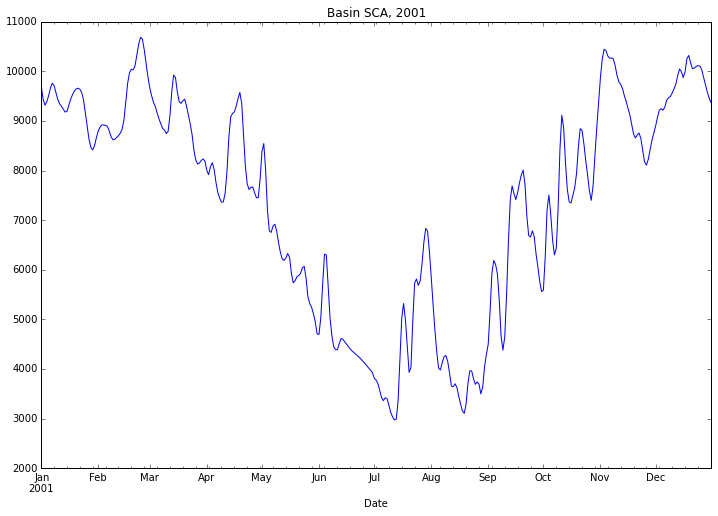

In [39]:
sca_by_doy.plot( title='Basin SCA, 2001', figsize=(12,8) )

Here is a diagram showing the three main parts of a figure in matplotlib.pyplot:

<img src="pyplot_figure_parts.png">

For more options on matplotlib line styles, see http://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html

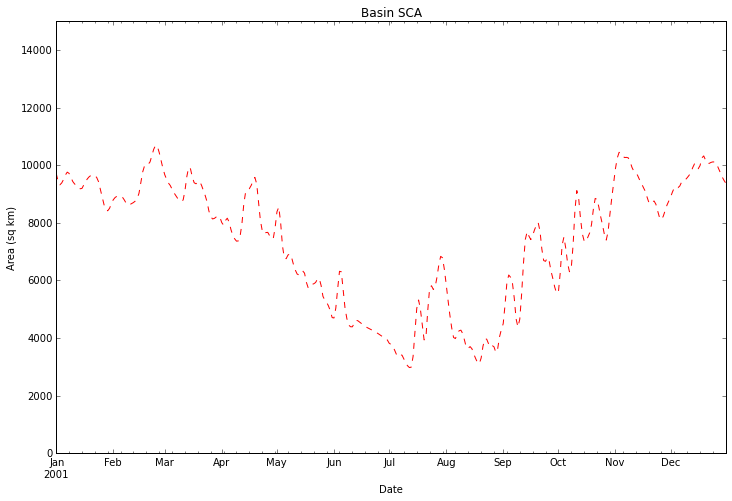

In [40]:
fig, ax = plt.subplots(1,1)
ax.set_title('Basin SCA')
ax.set_ylabel('Area (sq km)')
ax.set_ylim([0,15000])
plt.subplots_adjust(bottom=0.15)
# plot style cheatsheet:
# first character specifies color:
#   'b' : blue
#   'g' : green
#   'r' : red
#   'c' : cyan
#   'm' : magenta
#   'y' : yellow
#   'k' : black
# next 1 or 2 characters specify line style:
#   '_' : short horizontal lines
#   '-' : solid line (default)
#   '--' : dashed line
#   ':' : fine dots
#   'o' : solid circles
#   '.' : bigger dots 
sca_by_doy.plot( ax=ax, style='r--', figsize=(12,8) ) # here is another comment

## A plot along a row can be plotted as a real hypsometry (with elevations on y-axis and data values on x-axis)

Just using the default plot function will put the elevation bands on the x-axis, but this isn't very intuitive:

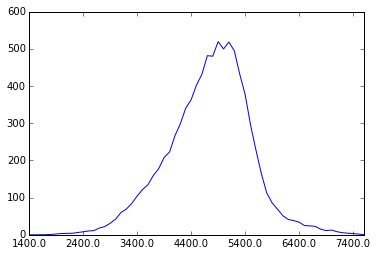

In [41]:
sca.data.ix['2001-01-31'].plot()

So we can turn this around by just asking for a horizontal bar plot:

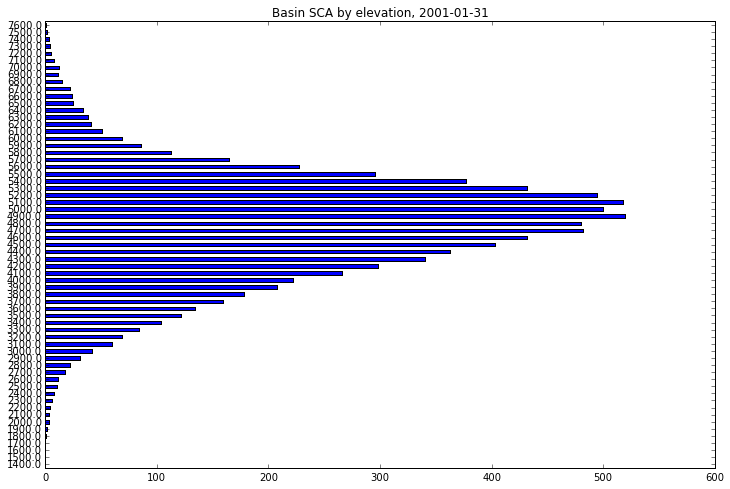

In [42]:
sca.data.ix['2001-01-31'].describe()
sca.data.ix['2001-01-31'].plot( title='Basin SCA by elevation, 2001-01-31', 
                               kind='barh', figsize=(12,8))
#sca.data.ix[['2001-01-31','2001-05-31']].plot( title='Basin SCA by elevation, 2001-01-31', subplots=True, kind='bar', figsize=(12,8))

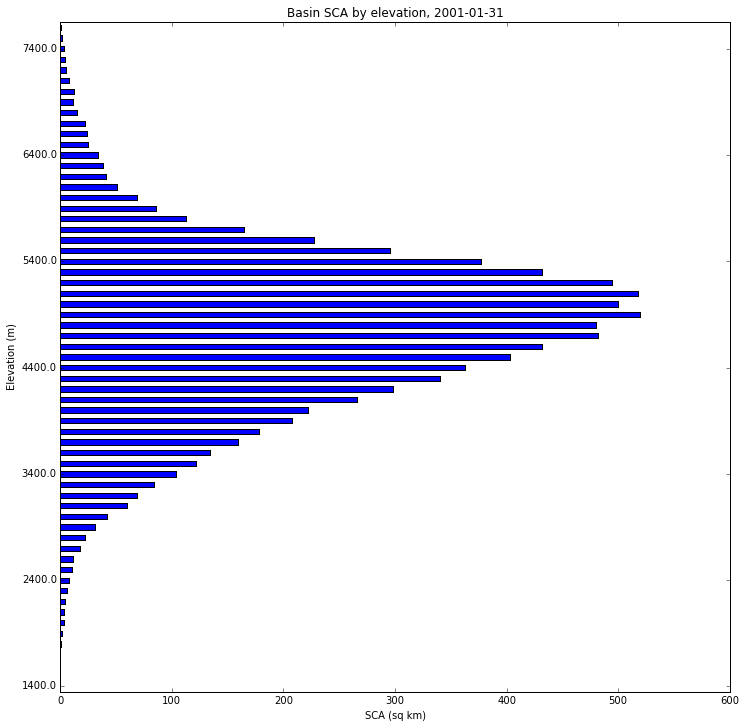

In [43]:
fig, ax = plt.subplots(1,1)
ax.set_title('Basin SCA by elevation, 2001-01-31')
ax.set_xlabel('SCA (sq km)')
ax.set_ylabel('Elevation (m)')
sca.data.ix['2001-01-31'].plot( kind='barh', figsize=(12,12))
ax.set_yticks( ax.get_yticks()[::10] )
ax.set_yticklabels( sca.data.columns[::10] )

## All of the built-in matplotlib functions are available, too:

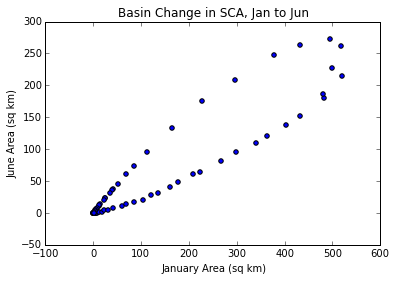

In [44]:
fig, ax = plt.subplots(1,1)
ax.set_title('Basin Change in SCA, Jan to Jun')
ax.set_xlabel('January Area (sq km)')
ax.set_ylabel('June Area (sq km)')
#ax.set_aspect('equal')
#ax.set_xlim( [ 0, 600 ] )
#ax.set_ylim( [ 0, 600 ] )
#plt.subplots_adjust(bottom=0.15)

plt.scatter(sca.data.ix['2001-01-31'], sca.data.ix['2001-06-30'] )

## Save data to an external file

In [45]:
fig.savefig('sca_plot.png', dpi=300 )  # change filename to .pdf to save to different format
